<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span><ul class="toc-item"><li><span><a href="#Json-to-csv---merge-all-jsons-into-one-csv" data-toc-modified-id="Json-to-csv---merge-all-jsons-into-one-csv-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Json to csv - merge all jsons into one csv</a></span></li><li><span><a href="#Flattening-JSons---from-kaggle" data-toc-modified-id="Flattening-JSons---from-kaggle-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Flattening JSons - from kaggle</a></span></li><li><span><a href="#In-a-loop-on-real-data-now" data-toc-modified-id="In-a-loop-on-real-data-now-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>In a loop on real data now</a></span></li><li><span><a href="#Correlation-of-Columns" data-toc-modified-id="Correlation-of-Columns-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Correlation of Columns</a></span></li><li><span><a href="#Regression-on-this-dataset" data-toc-modified-id="Regression-on-this-dataset-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Regression on this dataset</a></span><ul class="toc-item"><li><span><a href="#With-ADAM-intead-of-RMSProp" data-toc-modified-id="With-ADAM-intead-of-RMSProp-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>With ADAM intead of RMSProp</a></span></li></ul></li></ul></li><li><span><a href="#Writing-a-flexible-hyperparameter-search-model" data-toc-modified-id="Writing-a-flexible-hyperparameter-search-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Writing a flexible hyperparameter search model</a></span></li><li><span><a href="#End-bookmark" data-toc-modified-id="End-bookmark-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>End bookmark</a></span></li></ul></div>

# Imports

In [13]:
import pandas as pd
import os
import glob
import numpy as np
import json
from IPython.display import clear_output

In [14]:
trace_files = glob.glob('./tracelyzer//*.json')
trace_files

['./tracelyzer\\1000-state-metrics_run_0.json',
 './tracelyzer\\1000-state-metrics_run_1.json',
 './tracelyzer\\1000-state-metrics_run_2.json',
 './tracelyzer\\1000-state-metrics_run_3.json',
 './tracelyzer\\1000-state-metrics_run_4.json',
 './tracelyzer\\10000-state-metrics_run_0.json',
 './tracelyzer\\10000-state-metrics_run_1.json',
 './tracelyzer\\10000-state-metrics_run_2.json',
 './tracelyzer\\10000-state-metrics_run_3.json',
 './tracelyzer\\10000-state-metrics_run_4.json']

In [15]:
jsondf = pd.DataFrame()

In [18]:
# dataframe = pd.DataFrame.from_dict(a_json, orient="index")
testdf = pd.DataFrame.from_dict(jsonstr['metrics'][0],orient="index").T
testdf.append(pd.DataFrame.from_dict(jsonstr['metrics'][1],orient="index").T)

,name,value
0,Timestamp,47416.6
0,AudioHandlers,0


In [19]:
tempdf = pd.DataFrame(columns=['name','value'])
for i in range(len(metrics)):
#     print(metrics[i]['name'], metrics[i]['value'])
    tempdf.loc[i] = [metrics[i]['name'], float(metrics[i]['value'])]#['name' + str(i)] + list(randint(10, size=2))
tempdf.T

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
name,Timestamp,AudioHandlers,Documents,Frames,JSEventListeners,LayoutObjects,MediaKeySessions,MediaKeys,Nodes,Resources,...,V8CompileDuration,TaskDuration,TaskOtherDuration,ThreadTime,ProcessTime,JSHeapUsedSize,JSHeapTotalSize,FirstMeaningfulPaint,DomContentLoaded,NavigationStart
value,47416.6,0,6,2,200,10121,0,0,10402,36,...,0.005253,1.24273,0.173812,1.1114,2.82812,1.9859e+07,3.69705e+07,0,47415.5,47414.9


In [20]:
for file in trace_files:
    with open(file) as f:
        jsonstr = json.load(f)
        metrics = jsonstr['metrics']
        tempdf = pd.DataFrame(columns=['name','value'])
        for i in range(len(metrics)):
        #     print(metrics[i]['name'], metrics[i]['value'])
            tempdf.loc[i] = [metrics[i]['name'], float(metrics[i]['value'])]#['name' + str(i)] + list(randint(10, size=2))
    

In [21]:
tempdf

,name,value
0,Timestamp,4.741659e+04
1,AudioHandlers,0.000000e+00
2,Documents,6.000000e+00
3,Frames,2.000000e+00
4,JSEventListeners,2.000000e+02
5,LayoutObjects,1.012100e+04
6,MediaKeySessions,0.000000e+00
7,MediaKeys,0.000000e+00
8,Nodes,1.040200e+04
9,Resources,3.600000e+01


In [22]:
for file in trace_files:
    with open(file) as f:
        jsonstr = json.load(f)
        print(jsonstr)
        df = pd.DataFrame({'value': jsonstr})

{'profiling': {'categories': {'scripting': 208.08000007271767, 'rendering': 62.91099989414215, 'loading': 16.203999906778336, 'painting': 7.7670000195503235}, 'events': {'JS Frame': 183.70500010252, 'Layout': 33.78299996256828, 'Recalculate Style': 25.224999994039536, 'Parse HTML': 14.872999966144562, 'Minor GC': 7.224000036716461, 'Evaluate Script': 6.887999981641769, 'Paint': 5.556999951601028, 'Run Microtasks': 4.916000008583069, 'Update Layer Tree': 3.578999936580658, 'Compile Script': 3.3789999783039093, 'Composite Layers': 2.210000067949295, 'Animation Frame Fired': 1.5469999611377716, 'Parse Stylesheet': 1.3309999406337738, 'XHR Load': 0.39000001549720764, 'Hit Test': 0.3240000009536743, 'XHR Ready State Change': 0.030999988317489624}, 'functions': {'Layout': 33.78299996256828, 'UpdateLayoutTree': 25.224999994039536, 'ParseHTML': 14.872999966144562, 'f:_updateStyle@7': 14.118000090122223, 'f:@5': 10.07399994134903, 'f:./node_modules/leaflet/dist/leaflet-src.js@4': 8.853999972343

In [23]:
df

,value
connectEnd,1608062191222
connectStart,1608062191221
domComplete,1608062192547
domContentLoadedEventEnd,1608062191494
domContentLoadedEventStart,1608062191494
domInteractive,1608062191494
domLoading,1608062191227
domainLookupEnd,1608062190919
domainLookupStart,1608062190919
fetchStart,1608062190918


In [24]:
# for file in trace_files:
#     with open(file,'r') as f:
#         lines = f.read()
#         runs = lines.split("--------------------")
#         for run in runs:
#             if len(run) > 1:
#                 submetrics = run.split('\n')
#                 jsons = []
#                 for m in submetrics:
#                     if m != '':
#                         if json.loads(m):
#                             metric = json.loads(m)
#                             jsons.append(metric)
#                             with pd.read_json(metric) as tempdf:
#                                 print(tempdf)
                            
#                 jsons[0].update(jsons[1])
#                 with open(f'{file}-merged.json','a') as fw:
#                     json.dump(jsons[0],fw)
#                     print(json.dumps(jsons[0]))
#             clear_output(wait=False)

In [22]:
# len(run)

## Json to csv - merge all jsons into one csv

Life can and should be simpler

In [29]:
def flatten_json(y):
    out = {}

    def flatten(x, name=''):
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '_')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = x
    flatten(y)
    return out

In [30]:
jsonstr.keys()

dict_keys(['profiling', 'rendering', 'metrics', 'connectStart', 'navigationStart', 'loadEventEnd', 'domLoading', 'secureConnectionStart', 'fetchStart', 'domContentLoadedEventStart', 'responseStart', 'responseEnd', 'domInteractive', 'domainLookupEnd', 'redirectStart', 'requestStart', 'unloadEventEnd', 'unloadEventStart', 'domComplete', 'domainLookupStart', 'loadEventStart', 'domContentLoadedEventEnd', 'redirectEnd', 'connectEnd'])

In [31]:
flatten_json(jsonstr['rendering'])

{'firstPaint': 0.605076,
 'forcedReflowEvents': 5,
 'fps_mean': 7.87,
 'fps_variance': 474.21,
 'fps_sd': 21.78,
 'fps_lo': 4.38,
 'fps_hi': 56.32}

In [32]:
list[flatten_json(jsonstr[g]) for g in jsonstr.keys() ] 

SyntaxError: invalid syntax (<ipython-input-32-f1573d73dadf>, line 1)

## Flattening JSons - from kaggle

In [64]:
import json 
import pandas as pd 
from pandas import json_normalize #package for flattening json in pandas df

In [65]:
#load json object
with open(trace_files[0]) as f:
    d = json.load(f)

#lets put the data into a pandas df
#clicking on raw_nyc_phil.json under "Input Files"
#tells us parent node is 'programs'
nycphil = json_normalize(d['profiling']['categories'])
nycphil.head(3)

,scripting,rendering,loading,painting
0,208.08,62.911,16.204,7.767


In [66]:
nycphil1 = json_normalize(d['profiling']['events'])
nycphil1.head(3)

,JS Frame,Layout,Recalculate Style,Parse HTML,Minor GC,Evaluate Script,Paint,Run Microtasks,Update Layer Tree,Compile Script,Composite Layers,Animation Frame Fired,Parse Stylesheet,XHR Load,Hit Test,XHR Ready State Change
0,183.705,33.783,25.225,14.873,7.224,6.888,5.557,4.916,3.579,3.379,2.21,1.547,1.331,0.39,0.324,0.031


In [67]:
nycphil2 = json_normalize(d['rendering'])
nycphil2.head(3)

,firstPaint,forcedReflowEvents,fps.mean,fps.variance,fps.sd,fps.lo,fps.hi
0,3.068475,5,24.91,5841.6,76.43,2.74,205.63


In [68]:
nycphil3 = json_normalize(data=d['metrics'], meta=['name','value'])#json_normalize(d['metrics'])
nycphil3 = nycphil3.set_index('name')
# nycphil3 = nycphil3.rename(columns={"value": "0"})
nycphil3 = nycphil3.T
nycphil3.head(3)

name,Timestamp,AudioHandlers,Documents,Frames,JSEventListeners,LayoutObjects,MediaKeySessions,MediaKeys,Nodes,Resources,...,V8CompileDuration,TaskDuration,TaskOtherDuration,ThreadTime,ProcessTime,JSHeapUsedSize,JSHeapTotalSize,FirstMeaningfulPaint,DomContentLoaded,NavigationStart
value,149875.221675,0.0,6.0,2.0,173.0,1121.0,0.0,0.0,1339.0,27.0,...,0.003375,0.350691,0.083989,0.404158,3.453125,8585724.0,15736832.0,0.0,149874.661378,149871.618395


In [69]:
nycphil4 = d['performanceTiming']
nycphil4 = pd.DataFrame({'value':json.loads(nycphil4)})
nycphil4 = nycphil4.T
nycphil4.head(3)

,connectEnd,connectStart,domComplete,domContentLoadedEventEnd,domContentLoadedEventStart,domInteractive,domLoading,domainLookupEnd,domainLookupStart,fetchStart,...,loadEventStart,navigationStart,redirectEnd,redirectStart,requestStart,responseEnd,responseStart,secureConnectionStart,unloadEventEnd,unloadEventStart
value,1608164646508,1608164646507,1608164649801,1608164649244,1608164649243,1608164649243,1608164646515,1608164646202,1608164646202,1608164646200,...,1608164649801,1608164646200,0,0,1608164646508,1608164646512,1608164646511,0,0,0


In [70]:
nycphil.shape, nycphil1.shape, nycphil2.shape, nycphil3.shape

((1, 4), (1, 16), (1, 7), (1, 35))

In [71]:
for col in nycphil1:
    nycphil[col] = nycphil1[col]
nycphil

,scripting,rendering,loading,painting,JS Frame,Layout,Recalculate Style,Parse HTML,Minor GC,Evaluate Script,Paint,Run Microtasks,Update Layer Tree,Compile Script,Composite Layers,Animation Frame Fired,Parse Stylesheet,XHR Load,Hit Test,XHR Ready State Change
0,208.08,62.911,16.204,7.767,183.705,33.783,25.225,14.873,7.224,6.888,5.557,4.916,3.579,3.379,2.21,1.547,1.331,0.39,0.324,0.031


In [72]:
for col in nycphil2:
    nycphil[col] = nycphil2[col]
nycphil

,scripting,rendering,loading,painting,JS Frame,Layout,Recalculate Style,Parse HTML,Minor GC,Evaluate Script,...,XHR Load,Hit Test,XHR Ready State Change,firstPaint,forcedReflowEvents,fps.mean,fps.variance,fps.sd,fps.lo,fps.hi
0,208.08,62.911,16.204,7.767,183.705,33.783,25.225,14.873,7.224,6.888,...,0.39,0.324,0.031,3.068475,5,24.91,5841.6,76.43,2.74,205.63


In [73]:
for col in nycphil3:
#     print(nycphil3[col])
    nycphil[col] = nycphil3.iloc[0][col]
nycphil

,scripting,rendering,loading,painting,JS Frame,Layout,Recalculate Style,Parse HTML,Minor GC,Evaluate Script,...,V8CompileDuration,TaskDuration,TaskOtherDuration,ThreadTime,ProcessTime,JSHeapUsedSize,JSHeapTotalSize,FirstMeaningfulPaint,DomContentLoaded,NavigationStart
0,208.08,62.911,16.204,7.767,183.705,33.783,25.225,14.873,7.224,6.888,...,0.003375,0.350691,0.083989,0.404158,3.453125,8585724.0,15736832.0,0.0,149874.661378,149871.618395


In [74]:
for col in nycphil4:
#     print(nycphil4[col])
    nycphil[col] = nycphil4.iloc[0][col]
nycphil

,scripting,rendering,loading,painting,JS Frame,Layout,Recalculate Style,Parse HTML,Minor GC,Evaluate Script,...,loadEventStart,navigationStart,redirectEnd,redirectStart,requestStart,responseEnd,responseStart,secureConnectionStart,unloadEventEnd,unloadEventStart
0,208.08,62.911,16.204,7.767,183.705,33.783,25.225,14.873,7.224,6.888,...,1608164649801,1608164646200,0,0,1608164646508,1608164646512,1608164646511,0,0,0


In [75]:
# perfkeys = [key for key in d.keys() if key not in ['profiling','rendering','metrics']]
# nycphil4 = {
#         key:d[key] for key in perfkeys
#            }
# nycphil4 = pd.DataFrame(nycphil4,index={'value'})
# nycphil4.head()
# perfkeys

In [55]:
nycphil.shape

(1, 27)

In [58]:
# int(trace_file.split('\\')[1].split('-')[0])

In [59]:
# tempdf = mydf.copy()
# for i in range(tempdf.count()[0]):
#     tempdf[int(trace_file.split('\\')[1].split('-')[0])] = tempdf.iloc[i]
# #     print(tempdf.iloc[i])

In [60]:
tempdf

,name,value
0,Timestamp,4.741659e+04
1,AudioHandlers,0.000000e+00
2,Documents,6.000000e+00
3,Frames,2.000000e+00
4,JSEventListeners,2.000000e+02
5,LayoutObjects,1.012100e+04
6,MediaKeySessions,0.000000e+00
7,MediaKeys,0.000000e+00
8,Nodes,1.040200e+04
9,Resources,3.600000e+01


## In a loop on real data now

In [61]:
import json 
import pandas as pd 
import glob
from pandas import json_normalize #package for flattening json in pandas df
from tqdm import trange, tqdm

In [62]:
trace_files = glob.glob('./tracelyzer//*.json')
trace_files

['./tracelyzer\\1000-state-metrics_run_0.json',
 './tracelyzer\\1000-state-metrics_run_1.json',
 './tracelyzer\\1000-state-metrics_run_2.json',
 './tracelyzer\\1000-state-metrics_run_3.json',
 './tracelyzer\\1000-state-metrics_run_4.json',
 './tracelyzer\\10000-state-metrics_run_0.json',
 './tracelyzer\\10000-state-metrics_run_1.json',
 './tracelyzer\\10000-state-metrics_run_2.json',
 './tracelyzer\\10000-state-metrics_run_3.json',
 './tracelyzer\\10000-state-metrics_run_4.json']

In [63]:
shape_data = [int(trace_file.split('\\')[1].split('-')[0]) for trace_file in trace_files]
shape_data
from collections import Counter
sCounter = Counter(shape_data)
shapesdf = pd.DataFrame().from_dict({'value':dict(sCounter)})
shapesdf.shape, shapesdf

((2, 1),
        value
 1000       5
 10000      5)

In [85]:
mydf = pd.DataFrame()
#load json object
for trace_file in trace_files:
    with open(trace_file) as f:
        try:
            d = json.load(f)
        except:
            print(f'file: {file} cannot be read')
        
        #lets put the data into a pandas df
        #clicking on raw_nyc_phil.json under "Input Files"
        #tells us parent node is 'programs'
        nycphil = json_normalize(d['profiling']['categories'])
#         print(nycphil.head(3))
        
        nycphil1 = json_normalize(d['profiling']['events'])
#         print(nycphil1.head(3))
        
        nycphil2 = json_normalize(d['rendering'])
#         print(nycphil2.head(3))
        
        nycphil3 = json_normalize(data=d['metrics'], meta=['name','value'])#json_normalize(d['metrics'])
        nycphil3 = nycphil3.set_index('name')
        # nycphil3 = nycphil3.rename(columns={"value": "0"})
        nycphil3 = nycphil3.T
#         print(nycphil3.head(3))
        
        perfkeys = [key for key in d.keys() if key not in ['profiling','rendering','metrics']]
        nycphil4 = {
                key:d[key] for key in perfkeys
                   }
        nycphil4 = pd.DataFrame(nycphil4,index={'value'})
#         nycphil4.head()

#         print(nycphil.shape, nycphil1.shape, nycphil2.shape, nycphil3.shape)
        
        for col in nycphil1:
            nycphil[col] = nycphil1[col]
            
        for col in nycphil2:
            nycphil[col] = nycphil2[col]
        
        for col in nycphil3:
        #     print(nycphil3[col])
            nycphil[col] = nycphil3.iloc[0][col]
        
        for col in nycphil4:
        #     print(nycphil4[col])
            nycphil[col] = nycphil4.iloc[0][col]
        
        
#         print(nycphil.shape)
    mydf = nycphil if not mydf.count().any() else mydf.append(nycphil)

mydf

,scripting,rendering,painting,loading,JS Frame,Recalculate Style,Layout,Paint,Composite Layers,Minor GC,...,redirectStart,requestStart,unloadEventEnd,unloadEventStart,domComplete,domainLookupStart,loadEventStart,domContentLoadedEventEnd,redirectEnd,connectEnd
0,677.269,232.964,58.009,16.236,634.750,171.167,51.381,30.893,27.116,24.559,...,0,1608062178571,0,0,1608062179888,1608062178268,1608062179888,1608062178922,0,1608062178571
0,658.053,231.376,49.899,15.508,614.715,172.577,49.732,27.519,22.380,25.120,...,0,1608062181951,0,0,1608062182996,1608062181624,1608062182996,1608062182179,0,1608062181951
0,687.721,237.058,46.349,16.115,642.574,177.704,49.916,27.451,18.898,28.223,...,0,1608062184940,0,0,1608062186172,1608062184624,1608062186172,1608062185254,0,1608062184940
0,657.345,230.341,48.083,15.588,614.640,170.117,49.669,27.705,20.378,23.377,...,0,1608062188141,0,0,1608062189244,1608062187833,1608062189244,1608062188378,0,1608062188141
0,819.882,272.461,49.436,19.319,767.183,195.805,59.194,35.865,13.571,30.979,...,0,1608062191222,0,0,1608062192547,1608062190919,1608062192547,1608062191494,0,1608062191222


In [86]:
mydf

,scripting,rendering,painting,loading,JS Frame,Recalculate Style,Layout,Paint,Composite Layers,Minor GC,...,redirectStart,requestStart,unloadEventEnd,unloadEventStart,domComplete,domainLookupStart,loadEventStart,domContentLoadedEventEnd,redirectEnd,connectEnd
0,677.269,232.964,58.009,16.236,634.750,171.167,51.381,30.893,27.116,24.559,...,0,1608062178571,0,0,1608062179888,1608062178268,1608062179888,1608062178922,0,1608062178571
0,658.053,231.376,49.899,15.508,614.715,172.577,49.732,27.519,22.380,25.120,...,0,1608062181951,0,0,1608062182996,1608062181624,1608062182996,1608062182179,0,1608062181951
0,687.721,237.058,46.349,16.115,642.574,177.704,49.916,27.451,18.898,28.223,...,0,1608062184940,0,0,1608062186172,1608062184624,1608062186172,1608062185254,0,1608062184940
0,657.345,230.341,48.083,15.588,614.640,170.117,49.669,27.705,20.378,23.377,...,0,1608062188141,0,0,1608062189244,1608062187833,1608062189244,1608062188378,0,1608062188141
0,819.882,272.461,49.436,19.319,767.183,195.805,59.194,35.865,13.571,30.979,...,0,1608062191222,0,0,1608062192547,1608062190919,1608062192547,1608062191494,0,1608062191222


In [40]:
# is_NaN = mydf.isnull()
# row_has_NaN = is_NaN.any(axis=1)
# nans = mydf.loc[row_has_NaN == True]
# nans.to_csv('nans.csv')
mydf = mydf.fillna('0')

In [41]:
mydf.to_csv('metric-dataframe-8Dec2020.csv')

## Correlation of Columns

In [53]:
done = u'\u2713'
todo = u'\u2610'
done_list = [
    'Nodes','JSHeapUsedSize','JSHeapTotalSize'
     ,'scripting','rendering','painting','loading',
     'TaskDuration','ThreadTime','ProcessTime'
    ,'RecalcStyleCount'
    ,'LayoutDuration'
    ,'RecalcStyleDuration'
    ,'DevToolsCommandDuration'
    ,'ScriptDuration'
    ,'V8CompileDuration'
    ,'TaskOtherDuration'
            ]
for func in done_list:
    funcname = func.split("(")[0]
    print(done + funcname)
for func in [col for col in list(mydf.columns) if col not in done_list]:
    funcname = func.split("(")[0]
    print(todo + funcname)

✓Nodes
✓JSHeapUsedSize
✓JSHeapTotalSize
✓scripting
✓rendering
✓painting
✓loading
✓TaskDuration
✓ThreadTime
✓ProcessTime
✓RecalcStyleCount
✓LayoutDuration
✓RecalcStyleDuration
✓DevToolsCommandDuration
✓ScriptDuration
✓V8CompileDuration
✓TaskOtherDuration
☐JS Frame
☐Minor GC
☐Recalculate Style
☐Compile Script
☐Layout
☐Paint
☐Update Layer Tree
☐Composite Layers
☐Evaluate Script
☐Run Microtasks
☐Parse HTML
☐Hit Test
☐Major GC
☐Parse Stylesheet
☐Animation Frame Fired
☐firstPaint
☐forcedReflowEvents
☐fps.mean
☐fps.variance
☐fps.sd
☐fps.lo
☐fps.hi
☐Timestamp
☐AudioHandlers
☐Documents
☐Frames
☐JSEventListeners
☐LayoutObjects
☐MediaKeySessions
☐MediaKeys
☐Resources
☐ContextLifecycleStateObservers
☐V8PerContextDatas
☐WorkerGlobalScopes
☐UACSSResources
☐RTCPeerConnections
☐ResourceFetchers
☐AdSubframes
☐DetachedScriptStates
☐ArrayBufferContents
☐LayoutCount
☐FirstMeaningfulPaint
☐DomContentLoaded
☐NavigationStart


In [54]:
corrdf = mydf[done_list] #'Major GC','Minor GC'
corrdf

,Nodes,JSHeapUsedSize,JSHeapTotalSize,scripting,rendering,painting,loading,TaskDuration,ThreadTime,ProcessTime,RecalcStyleCount,LayoutDuration,RecalcStyleDuration,DevToolsCommandDuration,ScriptDuration,V8CompileDuration,TaskOtherDuration
0,11839.0,578982240.0,606568448.0,4024.107,258.527,29.821,7.770,5.559310,5.110484,13.281250,7.0,0.045493,0.198569,0.004323,3.844872,0.170650,1.295403
0,11839.0,578974656.0,606044160.0,3992.477,246.942,34.918,8.090,5.535281,5.115612,13.437500,6.0,0.039851,0.197637,0.002995,3.806032,0.176742,1.312024
0,11839.0,578975932.0,605782016.0,4019.479,245.804,29.737,8.943,5.568813,5.129816,13.671875,6.0,0.039925,0.196332,0.003197,3.839148,0.171951,1.318260
0,11839.0,579004920.0,606830592.0,3999.914,245.636,31.246,9.690,5.571211,5.127441,12.843750,7.0,0.040057,0.195420,0.003201,3.817857,0.173155,1.341521
0,11839.0,578979804.0,606306304.0,4620.789,270.111,33.084,10.673,6.274867,5.603333,14.234375,8.0,0.041956,0.211065,0.003047,4.314892,0.296786,1.407121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,7331.0,567883836.0,590499840.0,4224.692,169.569,16.675,9.710,5.704033,5.132829,12.343750,6.0,0.038025,0.124451,0.003051,4.030683,0.190086,1.317737
0,7331.0,567831628.0,590499840.0,3872.961,166.847,23.788,9.260,5.411753,4.984258,13.156250,6.0,0.036768,0.121271,0.003289,3.675823,0.192605,1.381997
0,7331.0,568042836.0,590499840.0,3870.943,171.404,18.046,8.555,5.367911,4.934539,11.953125,7.0,0.037010,0.126280,0.003136,3.685465,0.181253,1.334767
0,7331.0,567949748.0,590499840.0,3879.705,167.397,36.460,8.398,5.383438,4.955420,12.390625,14.0,0.035555,0.120999,0.003217,3.695307,0.180673,1.347687


In [55]:
corrdf['JSHeapRatio'] = corrdf['JSHeapUsedSize']/corrdf['JSHeapTotalSize']
corrdf = corrdf.drop(columns='JSHeapTotalSize')
corrdf

C:\Users\Sanke\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Nodes,JSHeapUsedSize,scripting,rendering,painting,loading,TaskDuration,ThreadTime,ProcessTime,RecalcStyleCount,LayoutDuration,RecalcStyleDuration,DevToolsCommandDuration,ScriptDuration,V8CompileDuration,TaskOtherDuration,JSHeapRatio
0,11839.0,578982240.0,4024.107,258.527,29.821,7.770,5.559310,5.110484,13.281250,7.0,0.045493,0.198569,0.004323,3.844872,0.170650,1.295403,0.954521
0,11839.0,578974656.0,3992.477,246.942,34.918,8.090,5.535281,5.115612,13.437500,6.0,0.039851,0.197637,0.002995,3.806032,0.176742,1.312024,0.955334
0,11839.0,578975932.0,4019.479,245.804,29.737,8.943,5.568813,5.129816,13.671875,6.0,0.039925,0.196332,0.003197,3.839148,0.171951,1.318260,0.955750
0,11839.0,579004920.0,3999.914,245.636,31.246,9.690,5.571211,5.127441,12.843750,7.0,0.040057,0.195420,0.003201,3.817857,0.173155,1.341521,0.954146
0,11839.0,578979804.0,4620.789,270.111,33.084,10.673,6.274867,5.603333,14.234375,8.0,0.041956,0.211065,0.003047,4.314892,0.296786,1.407121,0.954930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,7331.0,567883836.0,4224.692,169.569,16.675,9.710,5.704033,5.132829,12.343750,6.0,0.038025,0.124451,0.003051,4.030683,0.190086,1.317737,0.961700
0,7331.0,567831628.0,3872.961,166.847,23.788,9.260,5.411753,4.984258,13.156250,6.0,0.036768,0.121271,0.003289,3.675823,0.192605,1.381997,0.961612
0,7331.0,568042836.0,3870.943,171.404,18.046,8.555,5.367911,4.934539,11.953125,7.0,0.037010,0.126280,0.003136,3.685465,0.181253,1.334767,0.961970
0,7331.0,567949748.0,3879.705,167.397,36.460,8.398,5.383438,4.955420,12.390625,14.0,0.035555,0.120999,0.003217,3.695307,0.180673,1.347687,0.961812


In [56]:
corrdf.corr()

,Nodes,JSHeapUsedSize,scripting,rendering,painting,loading,TaskDuration,ThreadTime,ProcessTime,RecalcStyleCount,LayoutDuration,RecalcStyleDuration,DevToolsCommandDuration,ScriptDuration,V8CompileDuration,TaskOtherDuration,JSHeapRatio
Nodes,1.000000,0.950440,0.989017,0.990200,0.936726,-0.007361,0.988679,0.974179,0.634557,0.420848,0.960327,0.989898,0.129243,0.989473,-0.102723,0.626864,0.004110
JSHeapUsedSize,0.950440,1.000000,0.928467,0.953951,0.895657,-0.012566,0.936352,0.927550,0.620309,0.498904,0.921576,0.949846,0.141101,0.929101,-0.115511,0.635386,0.235237
scripting,0.989017,0.928467,1.000000,0.981662,0.934783,-0.032104,0.996616,0.975711,0.628877,0.409934,0.963702,0.980194,0.141410,0.999951,-0.034587,0.635250,-0.022504
rendering,0.990200,0.953951,0.981662,1.000000,0.932397,-0.018280,0.986298,0.972884,0.648341,0.446609,0.968028,0.998822,0.126447,0.981863,-0.093317,0.646135,0.012800
painting,0.936726,0.895657,0.934783,0.932397,1.000000,-0.016113,0.938788,0.920663,0.606603,0.431073,0.911187,0.928800,0.109103,0.935199,-0.084483,0.643943,0.027387
loading,-0.007361,-0.012566,-0.032104,-0.018280,-0.016113,1.000000,-0.030145,-0.016526,0.025562,-0.003435,0.005695,-0.019890,-0.061373,-0.031863,-0.060940,-0.020786,-0.009649
TaskDuration,0.988679,0.936352,0.996616,0.986298,0.938788,-0.030145,1.000000,0.988120,0.677497,0.457027,0.964886,0.982966,0.140324,0.996293,-0.040758,0.691936,0.008320
ThreadTime,0.974179,0.927550,0.975711,0.972884,0.920663,-0.016526,0.988120,1.000000,0.778809,0.520482,0.944261,0.966637,0.134071,0.974991,-0.064183,0.764416,0.051303
ProcessTime,0.634557,0.620309,0.628877,0.648341,0.606603,0.025562,0.677497,0.778809,1.000000,0.660627,0.606594,0.629432,0.080507,0.626081,-0.082110,0.899969,0.205334
RecalcStyleCount,0.420848,0.498904,0.409934,0.446609,0.431073,-0.003435,0.457027,0.520482,0.660627,1.000000,0.402911,0.411547,0.056997,0.408728,-0.125646,0.734472,0.291308


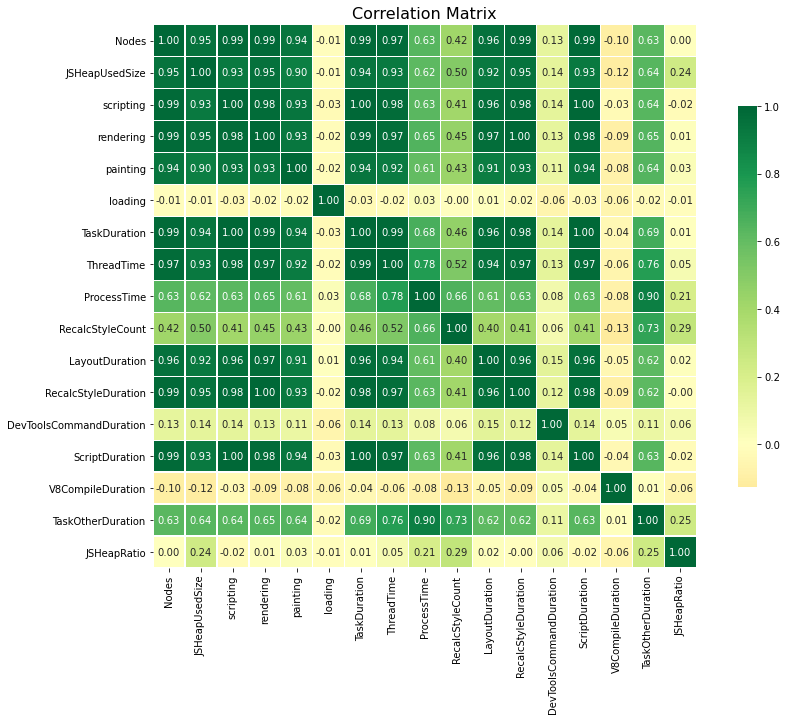

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def correlation_heatmap(train, method='pearson'):
    correlations = train.corr(method)

    fig, ax = plt.subplots(figsize=(15,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70},cmap='RdYlGn')
    plt.title('Correlation Matrix', fontsize=16);
    plt.show();
    
correlation_heatmap(corrdf) 

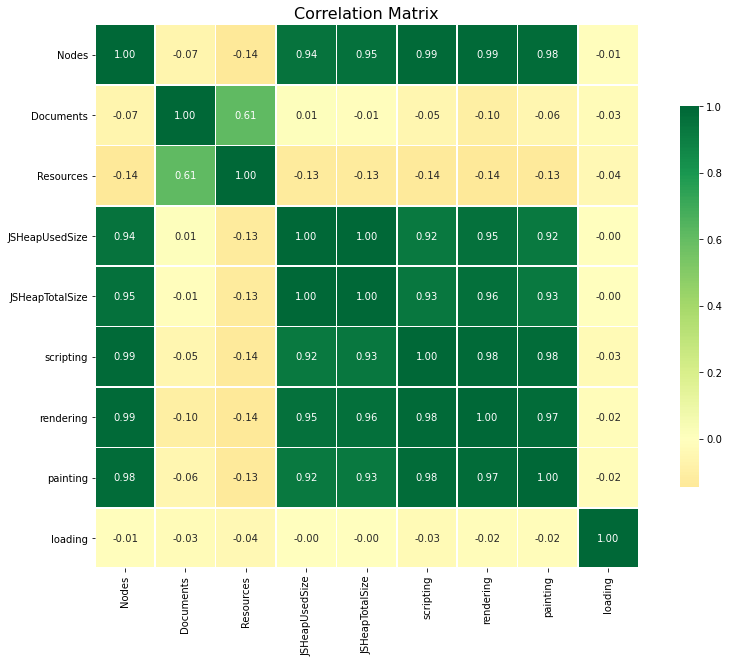

In [295]:
correlation_heatmap(corrdf,'spearman')

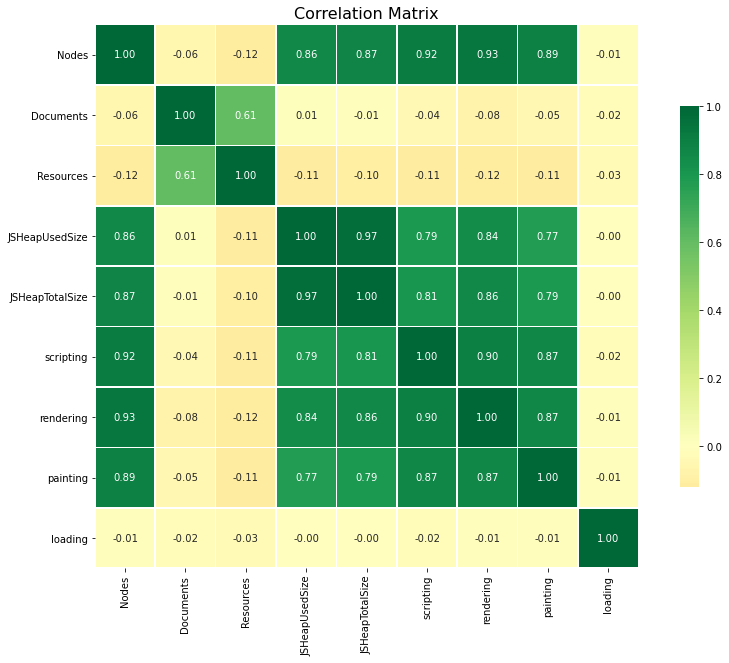

In [296]:
correlation_heatmap(corrdf,'kendall')

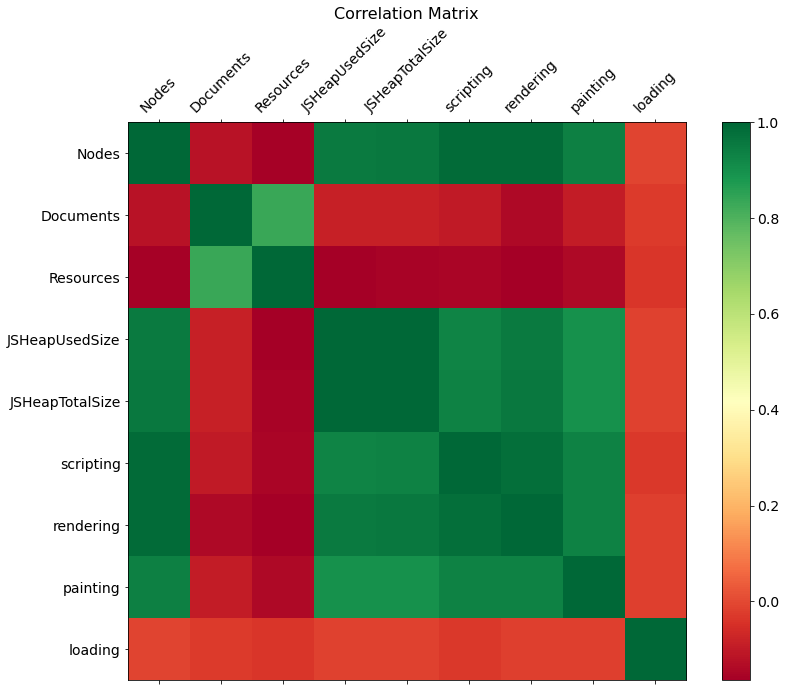

In [297]:
# cmap = ListedColormap(['r','g'])
f = plt.figure(figsize=(13, 10))
plt.matshow(corrdf.corr(), fignum=f.number, cmap='RdYlGn') #cmap=cmap
plt.xticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14, rotation=45)
plt.yticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [298]:
corrdf.corr('spearman')

,Nodes,Documents,Resources,JSHeapUsedSize,JSHeapTotalSize,scripting,rendering,painting,loading
Nodes,1.000000,-0.067920,-0.144152,0.943421,0.951788,0.988398,0.989157,0.981410,-0.010527
Documents,-0.067920,1.000000,0.607221,0.011050,-0.013311,-0.053927,-0.100121,-0.056887,-0.026283
Resources,-0.144152,0.607221,1.000000,-0.130308,-0.125145,-0.138509,-0.144584,-0.133953,-0.040095
JSHeapUsedSize,0.943421,0.011050,-0.130308,1.000000,0.998306,0.920304,0.954334,0.919593,-0.002569
JSHeapTotalSize,0.951788,-0.013311,-0.125145,0.998306,1.000000,0.929805,0.963354,0.928262,-0.003902
scripting,0.988398,-0.053927,-0.138509,0.920304,0.929805,1.000000,0.982625,0.976474,-0.031957
rendering,0.989157,-0.100121,-0.144584,0.954334,0.963354,0.982625,1.000000,0.973846,-0.019867
painting,0.981410,-0.056887,-0.133953,0.919593,0.928262,0.976474,0.973846,1.000000,-0.020827
loading,-0.010527,-0.026283,-0.040095,-0.002569,-0.003902,-0.031957,-0.019867,-0.020827,1.000000


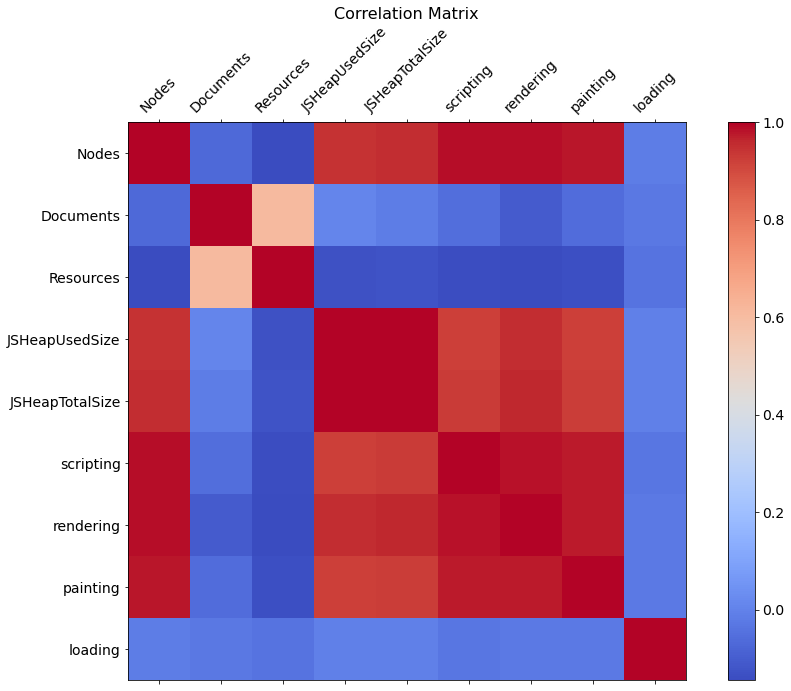

In [299]:
f = plt.figure(figsize=(15, 10))
plt.matshow(corrdf.corr('spearman'), fignum=f.number, cmap='coolwarm') #cmap=cmap
plt.xticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14, rotation=45)
plt.yticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## Regression on this dataset

In [300]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [301]:
#INSERT YOUR CODE TO BUILD AND COMPILE THE MODEL HERE
def reg_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model
    #YOU CAN ALSO CHANGE THE MODEL TRAINING PARAMETERS BELOW

In [302]:
model_data = corrdf.drop(columns=['loading','Documents','Resources'])
model_data

,Nodes,JSHeapUsedSize,JSHeapTotalSize,scripting,rendering,painting
0,11839.0,578982240.0,606568448.0,4024.107,258.527,29.821
0,11839.0,578974656.0,606044160.0,3992.477,246.942,34.918
0,11839.0,578975932.0,605782016.0,4019.479,245.804,29.737
0,11839.0,579004920.0,606830592.0,3999.914,245.636,31.246
0,11839.0,578979804.0,606306304.0,4620.789,270.111,33.084
...,...,...,...,...,...,...
0,7331.0,567883836.0,590499840.0,4224.692,169.569,16.675
0,7331.0,567831628.0,590499840.0,3872.961,166.847,23.788
0,7331.0,568042836.0,590499840.0,3870.943,171.404,18.046
0,7331.0,567949748.0,590499840.0,3879.705,167.397,36.460


In [303]:
train_dataset = model_data.iloc[:400]
test_dataset = model_data.iloc[400:]

In [304]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Nodes,400.0,2.725721e+04,1.516037e+04,1.419000e+03,1.408075e+04,2.788800e+04,3.856675e+04,5.400600e+04
JSHeapUsedSize,400.0,6.410953e+08,8.308513e+07,4.877208e+08,5.930578e+08,6.283301e+08,6.980581e+08,8.129797e+08
JSHeapTotalSize,400.0,6.712553e+08,8.681762e+07,5.092352e+08,6.207652e+08,6.602998e+08,7.309793e+08,8.496783e+08
scripting,400.0,5.474613e+03,1.261110e+03,3.170390e+03,4.420377e+03,5.535136e+03,6.473174e+03,7.795689e+03
rendering,400.0,5.512475e+02,2.746815e+02,5.819000e+01,2.924992e+02,5.949010e+02,7.368715e+02,1.069410e+03
painting,400.0,9.107540e+01,5.464218e+01,7.037000e+00,4.226625e+01,8.612450e+01,1.310863e+02,3.011640e+02


In [305]:
train_labels = train_dataset.pop('Nodes')
test_labels = test_dataset.pop('Nodes')

In [306]:
len(train_dataset),len(test_dataset)

(400, 108)

In [307]:
normed_train_data.head()

,JSHeapTotalSize,JSHeapUsedSize,ProcessTime,TaskDuration,ThreadTime,painting,rendering,scripting
0,-0.745089,-0.747583,-1.187922,-1.188393,-1.161712,-1.121009,-1.065672,-1.150182
0,-0.751128,-0.747674,-1.155884,-1.203583,-1.157991,-1.027730,-1.107848,-1.175263
0,-0.754147,-0.747659,-1.107828,-1.182386,-1.147685,-1.122547,-1.111991,-1.153852
0,-0.742069,-0.747310,-1.277626,-1.180870,-1.149408,-1.094931,-1.112603,-1.169366
0,-0.748108,-0.747612,-0.992494,-0.736069,-0.804087,-1.061294,-1.023500,-0.677042


In [308]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_train_data = normed_train_data.drop(columns='Nodes')
normed_test_data = norm(test_dataset)
normed_test_data = normed_test_data.drop(columns='Nodes')

In [309]:
model = reg_model()
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

In [310]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2,
  callbacks=[early_stop]
)

Epoch 1/1000
10/10 [==============================] - 0s 13ms/step - loss: 697936832.0000 - mae: 23567.9023 - mse: 697936832.0000 - val_loss: 2069055488.0000 - val_mae: 42010.2461 - val_mse: 2069055488.0000
Epoch 2/1000
10/10 [==============================] - 0s 5ms/step - loss: 697902080.0000 - mae: 23567.0527 - mse: 697902080.0000 - val_loss: 2068889600.0000 - val_mae: 42008.3828 - val_mse: 2068889600.0000
Epoch 3/1000
10/10 [==============================] - 0s 4ms/step - loss: 697866624.0000 - mae: 23566.2051 - mse: 697866624.0000 - val_loss: 2068715520.0000 - val_mae: 42006.3945 - val_mse: 2068715520.0000
Epoch 4/1000
10/10 [==============================] - 0s 4ms/step - loss: 697825728.0000 - mae: 23565.2285 - mse: 697825728.0000 - val_loss: 2068509056.0000 - val_mae: 42004.0586 - val_mse: 2068509056.0000
Epoch 5/1000
10/10 [==============================] - 0s 4ms/step - loss: 697775104.0000 - mae: 23564.0176 - mse: 697775104.0000 - val_loss: 2068244480.0000 - val_mae: 42001.0

Epoch 79/1000
10/10 [==============================] - 0s 4ms/step - loss: 634948864.0000 - mae: 22223.9746 - mse: 634948864.0000 - val_loss: 1766750592.0000 - val_mae: 38446.7773 - val_mse: 1766750592.0000
Epoch 80/1000
10/10 [==============================] - 0s 4ms/step - loss: 632948864.0000 - mae: 22186.2305 - mse: 632948864.0000 - val_loss: 1757245056.0000 - val_mae: 38329.3867 - val_mse: 1757245056.0000
Epoch 81/1000
10/10 [==============================] - 0s 4ms/step - loss: 630913408.0000 - mae: 22152.7422 - mse: 630913408.0000 - val_loss: 1747330304.0000 - val_mae: 38207.3672 - val_mse: 1747330304.0000
Epoch 82/1000
10/10 [==============================] - 0s 4ms/step - loss: 628849600.0000 - mae: 22120.3730 - mse: 628849600.0000 - val_loss: 1737499264.0000 - val_mae: 38085.4922 - val_mse: 1737499264.0000
Epoch 83/1000
10/10 [==============================] - 0s 4ms/step - loss: 626753152.0000 - mae: 22084.9883 - mse: 626753152.0000 - val_loss: 1727293696.0000 - val_mae: 379

Epoch 158/1000
10/10 [==============================] - 0s 4ms/step - loss: 383498528.0000 - mae: 17847.1602 - mse: 383498528.0000 - val_loss: 562068864.0000 - val_mae: 22650.3789 - val_mse: 562068864.0000
Epoch 159/1000
10/10 [==============================] - 0s 4ms/step - loss: 379400000.0000 - mae: 17758.0254 - mse: 379400000.0000 - val_loss: 544692544.0000 - val_mae: 22320.8125 - val_mse: 544692544.0000
Epoch 160/1000
10/10 [==============================] - 0s 4ms/step - loss: 375354048.0000 - mae: 17669.8594 - mse: 375354048.0000 - val_loss: 527685120.0000 - val_mae: 21990.6250 - val_mse: 527685120.0000
Epoch 161/1000
10/10 [==============================] - 0s 4ms/step - loss: 371304544.0000 - mae: 17580.9336 - mse: 371304544.0000 - val_loss: 510643872.0000 - val_mae: 21654.3652 - val_mse: 510643872.0000
Epoch 162/1000
10/10 [==============================] - 0s 4ms/step - loss: 367185472.0000 - mae: 17490.6719 - mse: 367185472.0000 - val_loss: 493305344.0000 - val_mae: 21303.7

Epoch 198/1000
10/10 [==============================] - 0s 4ms/step - loss: 217245280.0000 - mae: 13514.0986 - mse: 217245280.0000 - val_loss: 57817896.0000 - val_mae: 6536.1479 - val_mse: 57817896.0000
Epoch 199/1000
10/10 [==============================] - 0s 4ms/step - loss: 213307424.0000 - mae: 13384.7090 - mse: 213307424.0000 - val_loss: 53749024.0000 - val_mae: 6215.2891 - val_mse: 53749024.0000
Epoch 200/1000
10/10 [==============================] - 0s 4ms/step - loss: 209447200.0000 - mae: 13252.0488 - mse: 209447200.0000 - val_loss: 50488212.0000 - val_mae: 5973.6743 - val_mse: 50488212.0000
Epoch 201/1000
10/10 [==============================] - 0s 4ms/step - loss: 205583264.0000 - mae: 13120.0547 - mse: 205583264.0000 - val_loss: 47669864.0000 - val_mae: 5764.4854 - val_mse: 47669864.0000
Epoch 202/1000
10/10 [==============================] - 0s 4ms/step - loss: 201702368.0000 - mae: 12984.5840 - mse: 201702368.0000 - val_loss: 45573128.0000 - val_mae: 5601.0171 - val_mse:

In [311]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Nodes".format(mae))

4/4 - 0s - loss: 804862912.0000 - mae: 24988.5488 - mse: 804862912.0000
Testing set Mean Abs Error: 24988.55 Nodes


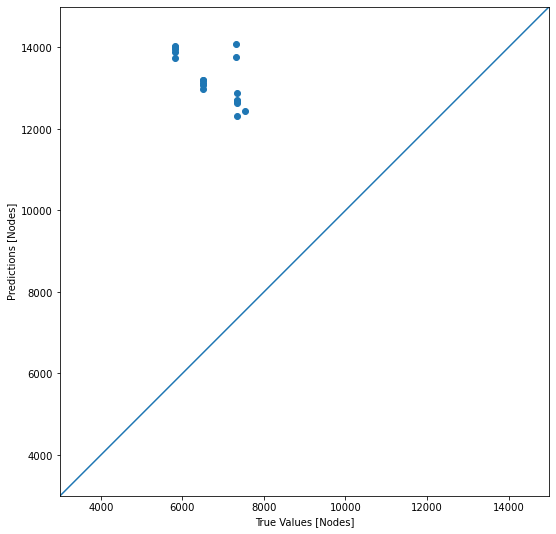

In [314]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Nodes]')
plt.ylabel('Predictions [Nodes]')
lims = [3000, 15000]
plt.xlim(lims)
plt.ylim(lims)
plt.gcf().set_size_inches((9,9))
_ = plt.plot(lims, lims)

In [315]:
test_labels

0    5815.0
0    5815.0
0    5815.0
0    5815.0
0    5815.0
      ...  
0    7331.0
0    7331.0
0    7331.0
0    7331.0
0    7548.0
Name: Nodes, Length: 108, dtype: float64

In [316]:
test_predictions

array([ 14030.975,  13958.536,  13741.924,  13890.784,  14019.522,
        77448.65 ,  73453.49 ,  99093.68 ,  78157.88 ,  92078.664,
        79668.86 ,  84932.82 ,  72869.68 ,  71711.375,  73042.48 ,
        69598.26 ,  73121.92 ,  69333.555,  70452.055,  70636.305,
        69843.06 ,  85496.86 ,  68599.34 ,  69103.016,  71473.555,
        78429.805,  77066.34 ,  94785.51 ,  80699.82 ,  74896.75 ,
        75229.484,  76919.67 ,  77765.9  ,  79002.95 ,  80660.164,
        77559.086,  81584.89 ,  79841.06 ,  77500.555,  88276.71 ,
        76029.69 ,  77378.9  ,  77094.055,  83549.266,  78234.74 ,
        87221.68 ,  81503.24 ,  83026.48 ,  88315.27 ,  85835.94 ,
        82444.445,  80802.44 , 122857.64 ,  83580.805,  81341.71 ,
        12987.675,  13067.254,  13195.288,  13128.304,  13189.628,
        99754.3  , 124709.414,  99318.61 , 100729.29 ,  96922.71 ,
        97576.13 ,  95832.9  ,  96474.11 ,  98302.   , 101386.54 ,
       112119.086, 110249.05 , 111203.64 , 109611.03 , 115850.

### With ADAM intead of RMSProp

In [324]:
#INSERT YOUR CODE TO BUILD AND COMPILE THE MODEL HERE
def reg_adam_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam(0.01)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model
    #YOU CAN ALSO CHANGE THE MODEL TRAINING PARAMETERS BELOW

In [327]:
model = reg_adam_model()
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

In [328]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2,
  callbacks=[early_stop]
)

Epoch 1/1000
10/10 [==============================] - 0s 12ms/step - loss: 697871424.0000 - mae: 23566.2969 - mse: 697871424.0000 - val_loss: 2067930368.0000 - val_mae: 41997.6172 - val_mse: 2067930368.0000
Epoch 2/1000
10/10 [==============================] - 0s 4ms/step - loss: 697301504.0000 - mae: 23551.8906 - mse: 697301504.0000 - val_loss: 2062955904.0000 - val_mae: 41939.7930 - val_mse: 2062955904.0000
Epoch 3/1000
10/10 [==============================] - 0s 4ms/step - loss: 695368384.0000 - mae: 23502.3945 - mse: 695368384.0000 - val_loss: 2048836352.0000 - val_mae: 41773.8398 - val_mse: 2048836352.0000
Epoch 4/1000
10/10 [==============================] - 0s 4ms/step - loss: 690539584.0000 - mae: 23375.1133 - mse: 690539584.0000 - val_loss: 2017589504.0000 - val_mae: 41402.3633 - val_mse: 2017589504.0000
Epoch 5/1000
10/10 [==============================] - 0s 4ms/step - loss: 680534464.0000 - mae: 23115.6172 - mse: 680534464.0000 - val_loss: 1959570688.0000 - val_mae: 40701.4

In [329]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Nodes".format(mae))

4/4 - 0s - loss: 837124928.0000 - mae: 25937.2656 - mse: 837124928.0000
Testing set Mean Abs Error: 25937.27 Nodes


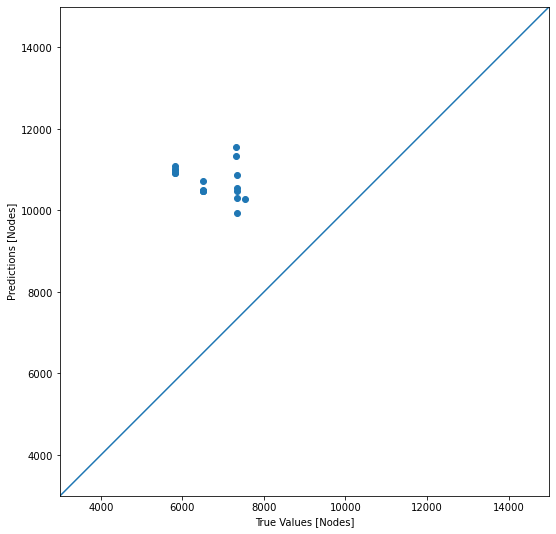

In [330]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Nodes]')
plt.ylabel('Predictions [Nodes]')
lims = [3000, 15000]
plt.xlim(lims)
plt.ylim(lims)
plt.gcf().set_size_inches((9,9))
_ = plt.plot(lims, lims)

# Writing a flexible hyperparameter search model

In [393]:
#INSERT YOUR CODE TO BUILD AND COMPILE THE MODEL HERE
def flex_reg_model(optimizer='Adam',activation='relu'):
    model = keras.Sequential([
        layers.Dense(64, activation=activation, input_shape=[len(train_dataset.keys())]),
        layers.Dense(32,activation=activation ),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam(0.01)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model
    #YOU CAN ALSO CHANGE THE MODEL TRAINING PARAMETERS BELOW

In [394]:
model = flex_reg_model()
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

In [395]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2,batch_size=128,
  callbacks=[early_stop]
)

Epoch 1/1000
3/3 [==============================] - 0s 35ms/step - loss: 697937536.0000 - mae: 23567.7539 - mse: 697937536.0000 - val_loss: 2068981760.0000 - val_mae: 42009.2578 - val_mse: 2068981760.0000
Epoch 2/1000
3/3 [==============================] - 0s 10ms/step - loss: 697873216.0000 - mae: 23566.1211 - mse: 697873216.0000 - val_loss: 2068595968.0000 - val_mae: 42004.7695 - val_mse: 2068595968.0000
Epoch 3/1000
3/3 [==============================] - 0s 8ms/step - loss: 697770112.0000 - mae: 23563.5293 - mse: 697770112.0000 - val_loss: 2067934208.0000 - val_mae: 41997.1055 - val_mse: 2067934208.0000
Epoch 4/1000
3/3 [==============================] - 0s 8ms/step - loss: 697606016.0000 - mae: 23559.3438 - mse: 697606016.0000 - val_loss: 2066888704.0000 - val_mae: 41985.0000 - val_mse: 2066888704.0000
Epoch 5/1000
3/3 [==============================] - 0s 7ms/step - loss: 697348992.0000 - mae: 23552.8730 - mse: 697348992.0000 - val_loss: 2065330432.0000 - val_mae: 41966.9609 - val

In [396]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Nodes".format(mae))

4/4 - 0s - loss: 179142013296968158284873728.0000 - mae: 13228499271680.0000 - mse: 179142013296968158284873728.0000
Testing set Mean Abs Error: 13228499271680.00 Nodes


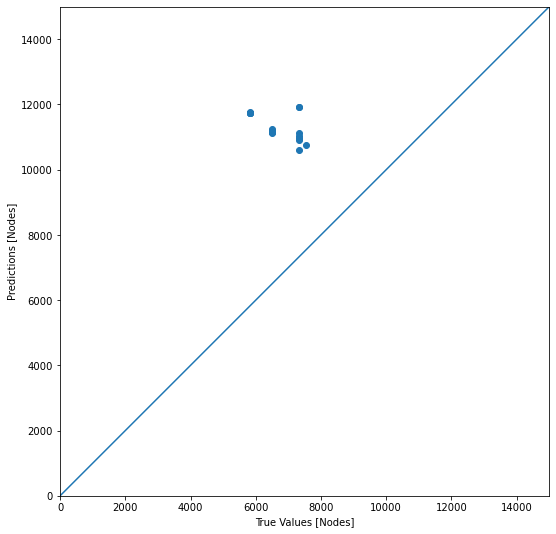

In [408]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Nodes]')
plt.ylabel('Predictions [Nodes]')
lims = [0, 15000]
plt.xlim(lims)
plt.ylim(lims)
plt.gcf().set_size_inches((9,9))
_ = plt.plot(lims, lims)

In [402]:
sample_test = np.array(normed_train_data.iloc[50]).reshape((1,5))
sample_test

array([[-0.42030595, -0.37776802, -0.97555406, -0.98704312, -0.95867842]])

In [403]:
normed_test_data.shape, sample_test.shape

((108, 5), (1, 5))

In [404]:
model.predict(sample_test), train_labels.iloc[50]

(array([[9239.249]], dtype=float32), 13856.0)

# End bookmark